### MEDC0106: Bioinformatics in Applied Biomedical Science

---------------------------------------------------------------

# 10 & 13 - Answers to exercises (Session 3)

**This notebook contains model answers to the exercises based around the material provided in Session 3 of the Python workshop**.

----

## Contents

1. [Task 1](#Task-1) – Basic data analysis
2. [Task 2](#Task-2) – Searching for correlations
3. [Task 3](#Task-3) – Model building

-----

In [1]:
# Run this cell before you attempt the exercises
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Task 1

#### Basic data analysis  

We have provided a dataset from the **National Institute of Diabetes and Digestive and Kidney Diseases**. This dataset includes various diagnostic measurements and indicates whether each patient has diabetes. All patients in this subset are female, at least 21 years old, and of Pima Indian heritage.

This task focuses on fundamental data analysis and is divided into multiple subtasks.

##### Reference
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). *Using the ADAP learning algorithm to forecast the onset of diabetes mellitus.* In *Proceedings of the Symposium on Computer Applications and Medical Care* (pp. 261–265). IEEE Computer Society Press.

##### Part 1

For this first part, read the CSV file using pandas and identify the following:<br>
a) The diagnostic measurements recorded for each patient.<br>
b) The data type of each measurement.<br>
c) The total number of patients assessed.

In [2]:
# Read the CSV file and check the diagnostic measurements recorded for each patient
data_path = 'https://raw.githubusercontent.com/MEDC0106/PythonWorkshop/main/workshop/session_3/data/diabetes.csv'
df = pd.read_csv(data_path)

print('\033[1ma)\033[0m')
print("Diagnostic measurements recorded for each patient:")
print(df.columns)

print('\n\033[1mb)\033[0m')
print("Data type of each measurement:")
print(df.dtypes)

print('\n\033[1mc)\033[0m')
print("Total number of patients assessed:", len(df))

a)
Diagnostic measurements recorded for each patient:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

b)
Data type of each measurement:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

c)
Total number of patients assessed: 768


##### Part 2

Although there are no null values, some entries contain unusual values.

a) Review the measurements and consider whether these values are plausible.<br>
b) After identifying unreliable measurements, remove these entries from the dataset.

In [3]:
print('\033[1ma)\033[0m')
print("Number of records before removing entries with unusual values:", len(df))
# Display a summary of the dataset to identify any potentially unreliable values (e.g., zeros in measurements that shouldn't be zero)
print("Summary statistics of the dataset:")
print(df.describe())

print('\n\033[1mb)\033[0m')
# Here we identify and remove rows where certain columns have zero values, which may be biologically implausible.
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_check:
    df = df[df[column] != 0]

# Display the number of records after removing unreliable entries
print("Number of records after removing entries with unusual values:", len(df))

a)
Number of records before removing entries with unusual values: 768
Summary statistics of the dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  


##### Part 3

Now that you have a clean dataset, count the number of patients with/without diabetes. Make a nice plot to visualise the result. Is the data balanced or not?

Number of patients with and without diabetes:
Outcome
0    262
1    130
Name: count, dtype: int64


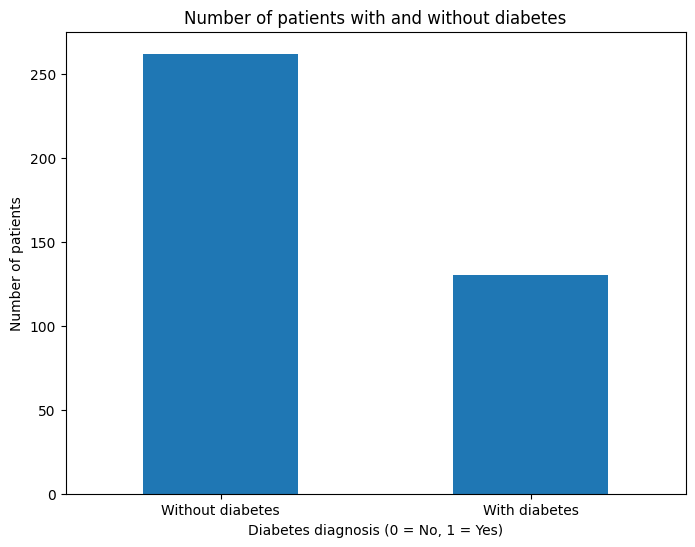


Is the data balanced?  No


In [4]:
# Count the number of patients with and without diabetes
outcome_counts = df['Outcome'].value_counts()

print("Number of patients with and without diabetes:")
print(outcome_counts)

# Plot the results
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar')
plt.title('Number of patients with and without diabetes')
plt.xlabel('Diabetes diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Number of patients')
plt.xticks([0, 1], ['Without diabetes', 'With diabetes'], rotation=0)
plt.show()

# Check if the data is balanced
# If the difference between the two counts is less than or equal to 10% of the dataset, the data is considered balanced
is_balanced = abs(outcome_counts[0] - outcome_counts[1]) <= 0.1 * len(df)
print("\nIs the data balanced? ", "Yes" if is_balanced == True else "No")

##### Part 4

Plot histograms for the diagnostic measurements. Observe the shape of each distribution.

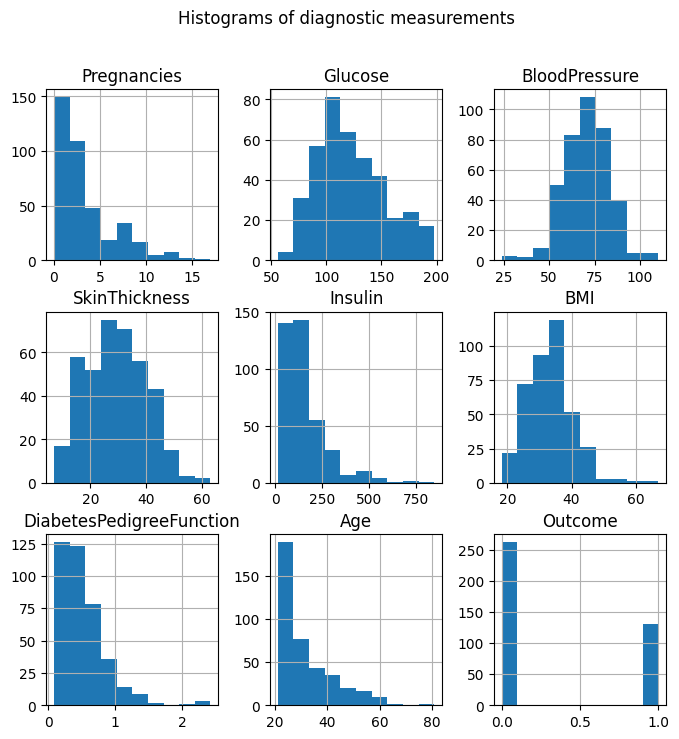

In [5]:
df.hist(figsize=[8, 8])
plt.suptitle("Histograms of diagnostic measurements")
plt.show()

## Task 2  

#### Searching for correlations

In this task, you will analyse the dataset from the **National Institute of Diabetes and Digestive and Kidney Diseases** to answer the following questions:

1. Is there a correlation between 'BMI' and 'Glucose'? (Create a plot to illustrate this.)

Correlation between BMI and Glucose: 0.22


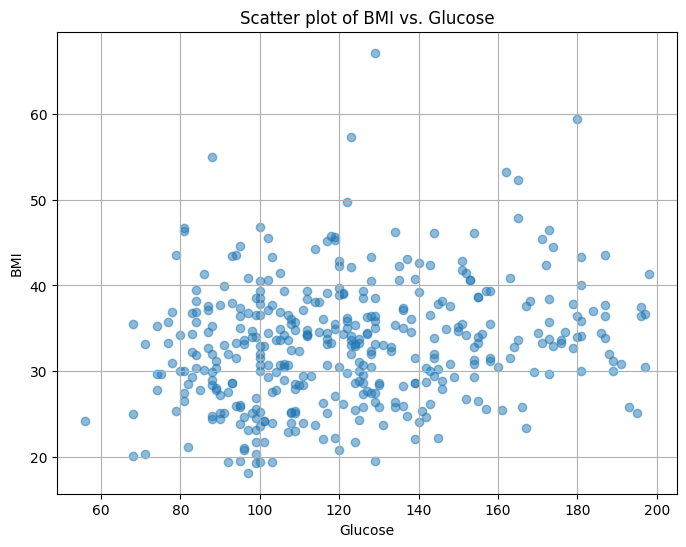

No correlation!


In [6]:
# Load the dataset
data_path = 'https://raw.githubusercontent.com/MEDC0106/PythonWorkshop/main/workshop/session_3/data/diabetes.csv'
df = pd.read_csv(data_path)

# Calculate the correlation between 'BMI' and 'Glucose'
correlation = df['BMI'].corr(df['Glucose'])
print(f"Correlation between BMI and Glucose: {correlation:.2f}")

# Clean up the data
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_check:
    df = df[df[column] != 0]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Glucose'], df['BMI'], alpha=0.5)
plt.title('Scatter plot of BMI vs. Glucose')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

if correlation <0.5:
    print('No correlation!')
else:
    print('Some correlation observed!')

2. Which two features have the strongest correlation with each other?

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the two features with the highest correlation
# We use `.unstack()` to convert the matrix to a Panda Series and `.dropna()` to remove self-correlations (1.0)
correlation_pairs = correlation_matrix.unstack().dropna()

# Remove self-correlations
correlation_pairs = correlation_pairs[correlation_pairs < 1]

# Sort correlations in descending order and get the highest pair (first row)
sorted_correlation_pairs = correlation_pairs.sort_values(ascending=False)
highest_correlation = sorted_correlation_pairs.iloc[0]

# Display the result
print("The two features with the highest correlation are:")
print(f"{sorted_correlation_pairs.index[0][0]} and {sorted_correlation_pairs.index[0][1]} with a correlation of {highest_correlation:.2f}")

The two features with the highest correlation are:
Age and Pregnancies with a correlation of 0.68


3. Which feature has the highest correlation with the outcome ("diabetes" diagnosis)?

In [8]:
# Calculate the correlation of each feature with the Outcome column
outcome_correlation = df.corr()['Outcome'].drop('Outcome')

# Find the feature with the highest correlation with Outcome
highest_corr_feature = outcome_correlation.idxmax()
highest_corr_value = outcome_correlation.max()

# Display the result
print(f"The feature with the highest correlation with the Outcome ('diabetes' diagnosis) is '{highest_corr_feature}' with a correlation of {highest_corr_value:.2f}")

The feature with the highest correlation with the Outcome ('diabetes' diagnosis) is 'Glucose' with a correlation of 0.52


4. Based on the data, would this problem be better suited as a classification or regression task?
-----
The `Outcome` variable in the dataset represents a **binary categorical target** (typically labeled as `0` for non-diabetic and `1` for diabetic), indicating the presence or absence of diabetes in an individual. Since we're predicting distinct classes (diabetic vs. non-diabetic) rather than a continuous value, this aligns with a **classification problem**.

## Task 3

#### Model building

Now that you've performed some data analysis, the next step is to build a model to predict the likelihood of diabetes based on diagnostic measurements. Specifically, you'll implement a simple [*k*-nearest neighbours (KNN) model](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). Follow the steps below to guide you through the process:

##### Part 1

Split the dataset into training and testing sets with an 80/20 ratio. Ensure the features and target are in separate DataFrames before splitting.

*Hint: You may need to separate the features (X) and the target variable (y) before proceeding with the split.*

In [9]:
# Separate features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shapes of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training set shape: (313, 8)
Testing set shape: (79, 8)
Training target shape: (313,)
Testing target shape: (79,)


##### Part 2

Since KNN is particularly sensitive to scale, you should standardise the features.

- Scale the training features.
- Apply the same scaling to the testing features.

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialise the scaler
scaler = StandardScaler()

# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the testing features
X_test_scaled = scaler.transform(X_test)

# No output is expected from this cell

##### Part 3

Train a KNN classifier using your split and scaled data. Experiment with different values for `n_neighbors` to find the best-performing setting in terms of accuracy. You can explore KNN parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

After identifying the optimal value for `n_neighbors`, evaluate your model with the following metrics:

- Accuracy
- Confusion matrix
- ROC-AUC

Best `n_neighbors` for accuracy: 1
Accuracy: 0.7088607594936709


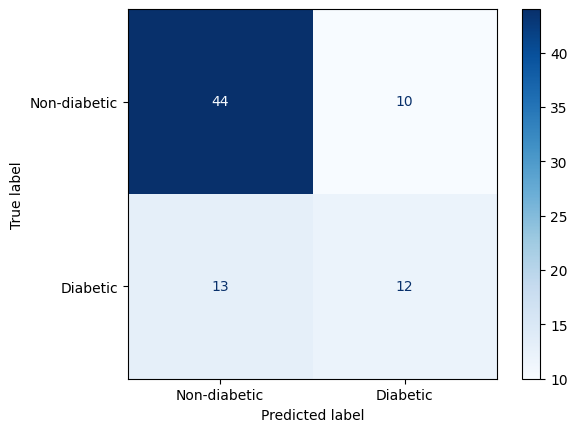

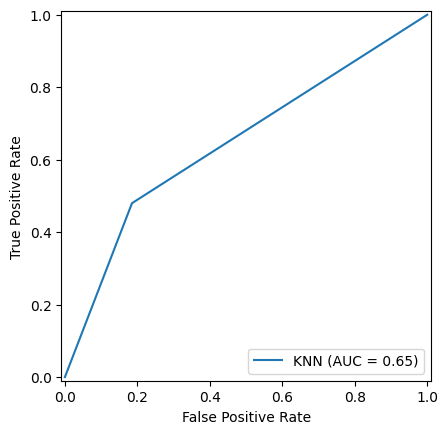

In [11]:
# Define range of neighbours to test
neighbors_range = range(1, 21)
accuracies = []

# Test different values of `n_neighbors` to find best accuracy
for n in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    y_pred_train = knn.predict(X_train_scaled)
    accuracies.append((y_pred_train == y_train).mean())  # Manual accuracy calculation

# Find the optimal number of neighbours
best_n = neighbors_range[accuracies.index(max(accuracies))]
print(f"Best `n_neighbors` for accuracy: {best_n}")

# Train the final model with best n_neighbors
knn_best = KNeighborsClassifier(n_neighbors=best_n)
knn_best.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_best.predict(X_test_scaled)

# Calculate accuracy manually
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy}")

# Construct a confusion matrix (NumPy array)
c_m = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay(c_m, display_labels=['Non-diabetic', 'Diabetic']).plot(cmap='Blues');

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN').plot();

##### Part 4

If you wish, try training a couple of different models to see if you can achieve better results.

- [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier)

SVM accuracy: 0.84


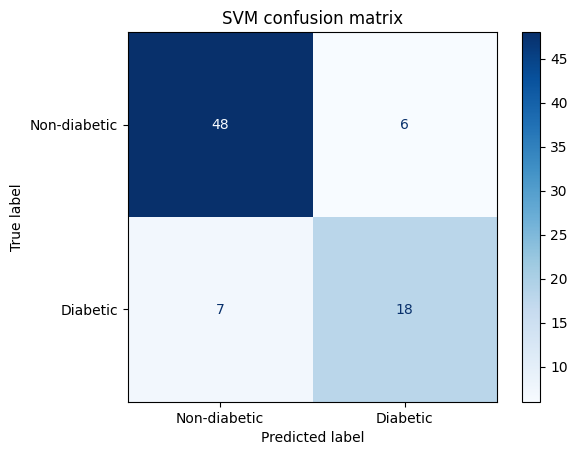

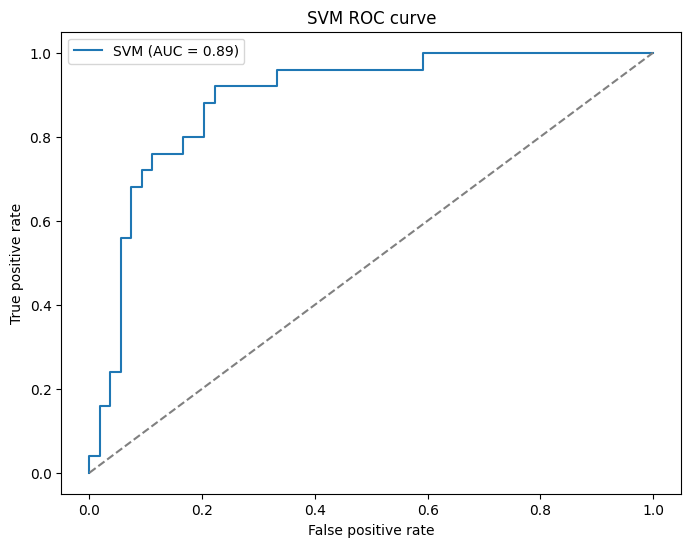

Random Forest accuracy: 0.84


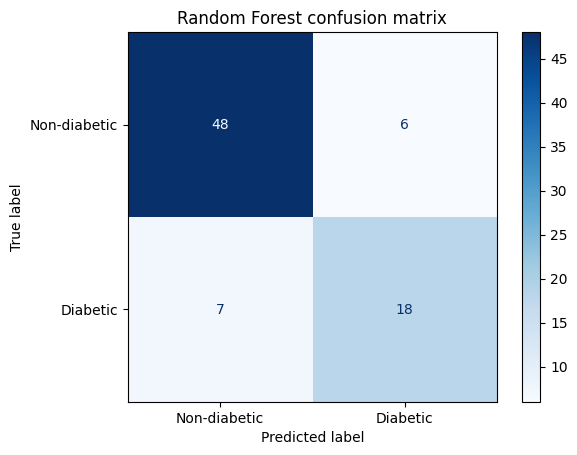

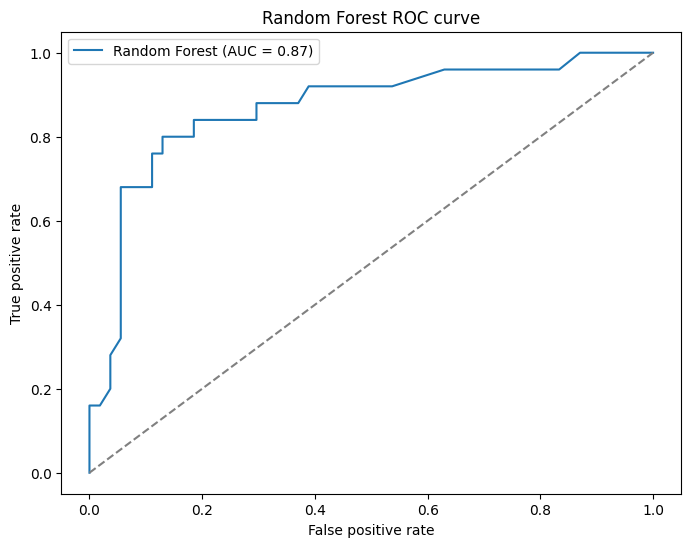

In [12]:
# Train and evaluate an SVM model
svm_model = SVC(probability=True)  # Enable probability to get ROC-AUC
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = (y_pred_svm == y_test).mean()
print(f"SVM accuracy: {accuracy_svm:.2f}")

# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(conf_matrix_svm, display_labels=['Non-diabetic', 'Diabetic']).plot(cmap='Blues');
plt.title("SVM confusion matrix")

# ROC curve and AUC
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], '--', color='grey')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend()
plt.show()

# Train and evaluate a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = (y_pred_rf == y_test).mean()
print(f"Random Forest accuracy: {accuracy_rf:.2f}")

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(conf_matrix_rf, display_labels=['Non-diabetic', 'Diabetic']).plot(cmap='Blues');
plt.title("Random Forest confusion matrix")

# ROC Curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], '--', color='grey')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend()
plt.show()